## **COVID-19: Cases, Vaccinations, Deaths, Predictions (India)🦠💉**<hr>

![alt text](https://southkingstownri.com/ImageRepository/Document?documentID=3809)

**Attribute Information**

* State/UTs - Names of Indian States and Union Territories.
* Total Cases - Total number of confirmed cases
* Active - Total number of active cases
* Discharged - Total number of discharged cases
* Deaths - Total number of deaths
* Active Ratio (%) - Ratio of number of active cases to total cases
* Discharge Ratio (%) - Ratio of number of discharged cases to total cases
* Death Ratio (%) - Ratio of number of deaths to total cases
* Dose 1 - Number of first dose of vaccine given
* Dose 2 - Number of second dose of vaccine given
* Total Vaccination Doses- Total number of vaccine doses given

### Importing all the libraries

In [79]:
# !pip install pandas_profiling
# !pip install fbprophet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from fbprophet import Prophet

## **Let's take a look at the overall COVID-19 situation prevailing in India**

### Importing the Dataset

In [3]:
dataset = pd.read_csv('./input/Latest Covid-19 India Status.csv')
dataset.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71
1,Andhra Pradesh,1995669,16341,1965657,13671,0.82,98.50,0.69
2,Arunachal Pradesh,51655,1763,49640,252,3.41,96.10,0.49
3,Assam,581398,8772,567113,5513,1.51,97.54,0.95
4,Bihar,725518,204,715665,9649,0.03,98.64,1.33


### Basic Data Wrangling

In [4]:
print("The shape of the first dataset is",dataset.shape)

The shape of the first dataset is (36, 8)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [6]:
dataset.describe(include = 'all')

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,36,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
unique,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Uttar Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.968294e+05,10205.972222,8.746090e+05,12014.416667,1.682222,97.052222,1.265000
std,NaN,1.303563e+06,30660.005408,1.262310e+06,23205.834381,3.335660,3.239175,0.564464
min,NaN,7.549000e+03,1.000000,7.419000e+03,4.000000,0.010000,81.440000,0.040000
25%,NaN,6.981775e+04,213.750000,6.598125e+04,803.750000,0.067500,97.150000,0.947500
50%,NaN,4.645165e+05,1062.500000,4.546995e+05,5322.500000,0.570000,98.200000,1.320000
75%,NaN,9.980822e+05,7369.500000,9.826742e+05,13579.500000,1.337500,98.597500,1.607500


In [7]:
dataset.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

### Exploratory Data Analysis

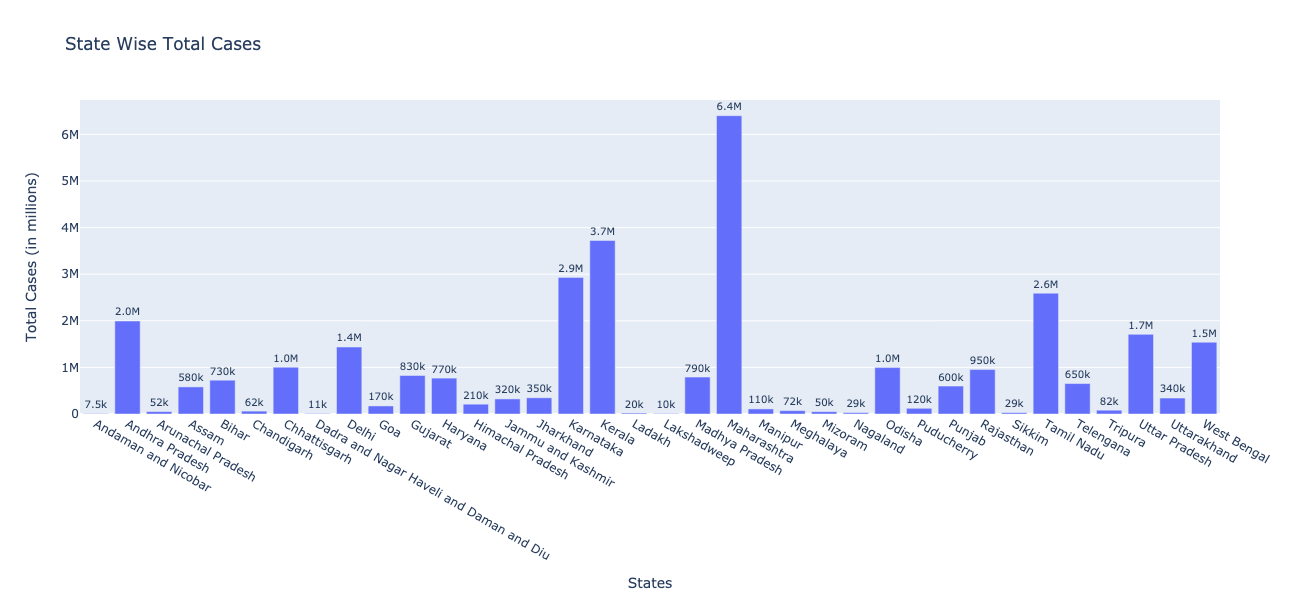

In [14]:
cases = dataset.groupby('State/UTs')['Total Cases'].sum()
ax = px.bar(x = cases.index, y = cases.values, text = cases.values,
       labels = {'x': 'States', 'y' : 'Total Cases (in millions)'}, title = 'State Wise Total Cases')
ax.update_traces(texttemplate='%{text:.2s}', textposition='outside')
ax.update_layout(uniformtext_minsize = 2, uniformtext_mode='hide', width=1300, height=600)
ax.show('png')

**Q) Which state or union territory is having highest number of cases?**

* As we can see from the above graph(Acumulated figures for Cases) Maharashtra is the state with the highest number of Covid-19 cases.
* *Cases: 6,401,213*

**Q) Which state or union territory is having the least number of cases?**

* As we can see from the above graph (Acumulated figures for Cases) Andaman and Nicobar is the union territory with least number of covid-19 cases.
* *Cases: 7549*

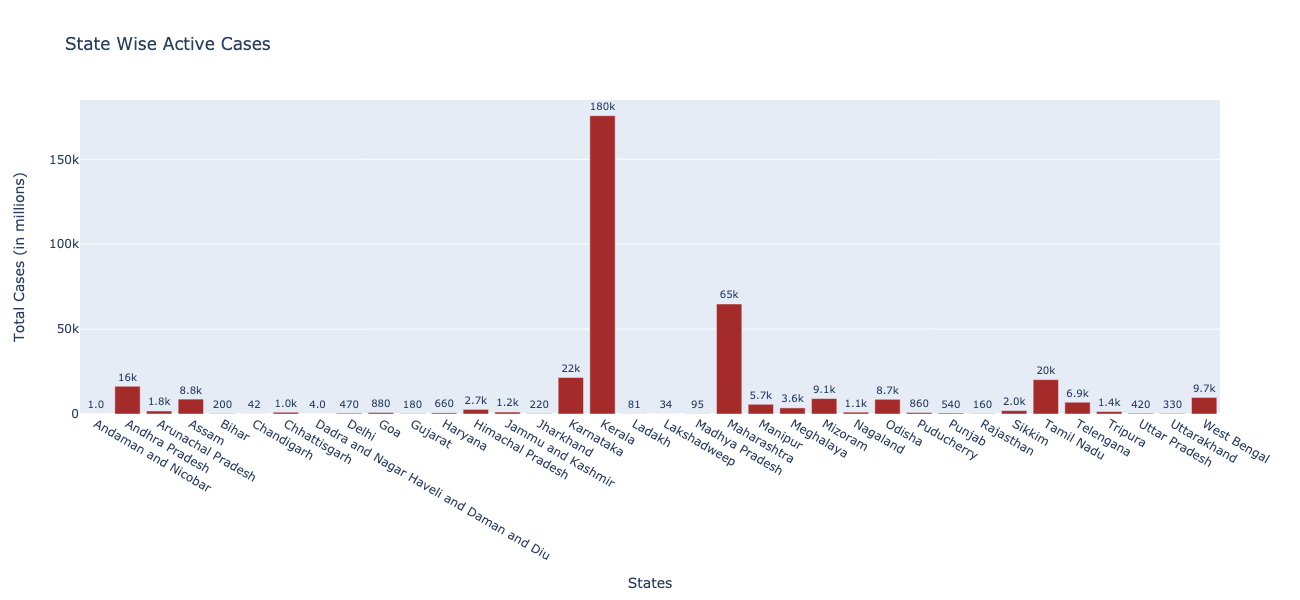

In [15]:
cases = dataset.groupby('State/UTs')['Active'].sum()
fig = px.bar(x = cases.index, y = cases.values, text = cases.values,
       labels = {'x': 'States', 'y' : 'Total Cases (in millions)'}, title = 'State Wise Active Cases')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color='brown')
fig.update_layout(uniformtext_minsize = 2, uniformtext_mode='hide', width=1300, height=600)
fig.show('png')

**Q) Which state or union territory is having highest number of Active cases?**

* As we can see from the above graph(Acumulated figures for Cases) Kerala is the state with the highest number of active Covid-19 cases.
* *Cases: 1,75,695*

**Q) Which state or union territory is having least number of Active cases?**

* As we can see from the above graph(Acumulated figures for Cases) Dadra and Nagar Haveli and Daman and Diu is the union territory with the least number of active Covid-19 cases.
* *Cases: 4*

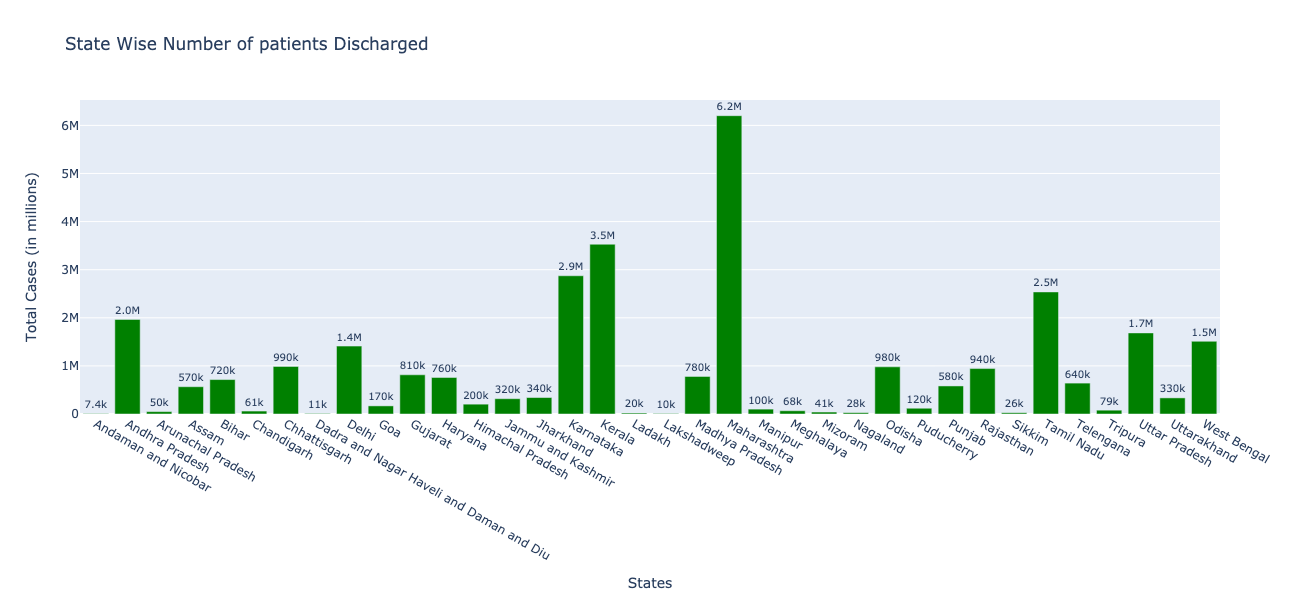

In [16]:
cases = dataset.groupby('State/UTs')['Discharged'].sum()
fig = px.bar(x = cases.index, y = cases.values, text = cases.values,
       labels = {'x': 'States', 'y' : 'Total Cases (in millions)'}, title = 'State Wise Number of patients Discharged')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color='green')
fig.update_layout(uniformtext_minsize = 2, uniformtext_mode='hide', width=1300, height=600)
fig.show('png')

**Q) Which state or union territory is having highest number of Recovery cases?**

* As we can see from the above graph(Acumulated figures for Cases) Maharashtra is the state with the highest recovery cases during Covid-19.
* *Recoveries: 6,201,168*

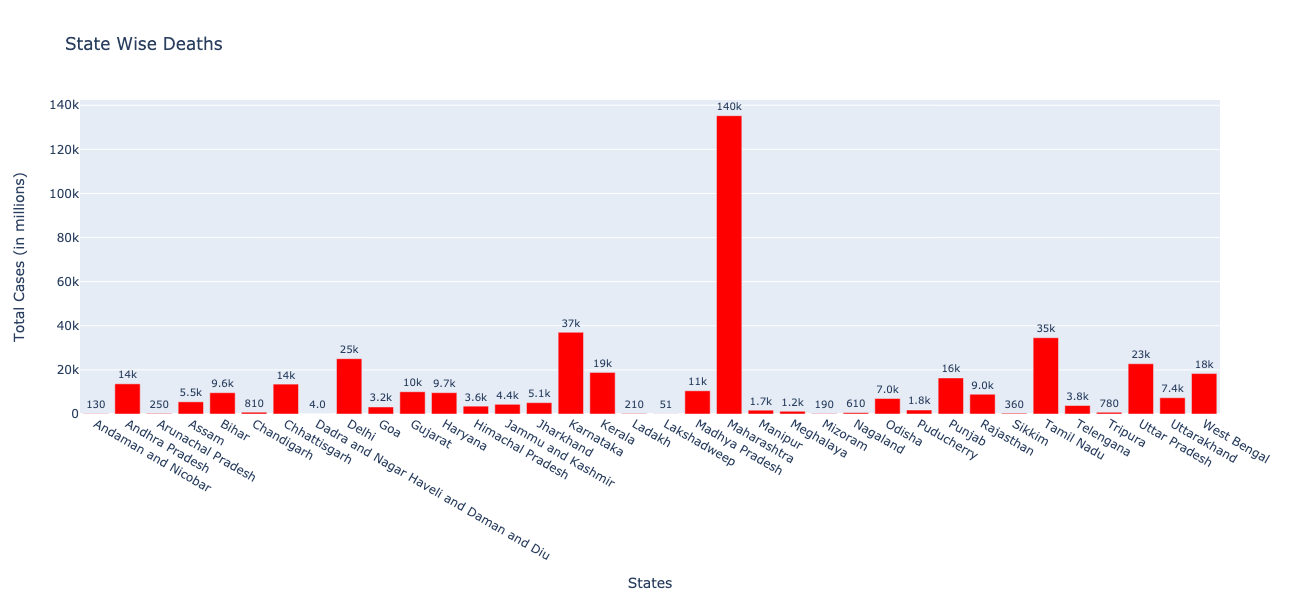

In [17]:
cases = dataset.groupby('State/UTs')['Deaths'].sum()
fig = px.bar(x = cases.index, y = cases.values, text = cases.values,
       labels = {'x': 'States', 'y' : 'Total Cases (in millions)'}, title = 'State Wise Deaths')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color='red')
fig.update_layout(uniformtext_minsize = 2, uniformtext_mode='hide', width=1300, height=600)
fig.show('png')

**Q) Which state or union territory has shown most number of deaths?**

* As we can see from the above graph(Acumulated figures for deaths) Maharashtra is the country with highest number of Deaths.
* *Deaths: 1,35,255*

**Q) Which state or union territory has shown least number of deaths?**

* As we can see from the above graph(Acumulated figures for deaths) Dadra and Nagar Haveli and Daman and Diu is the union territory with lowest number of Deaths.
* *Deaths: 4*

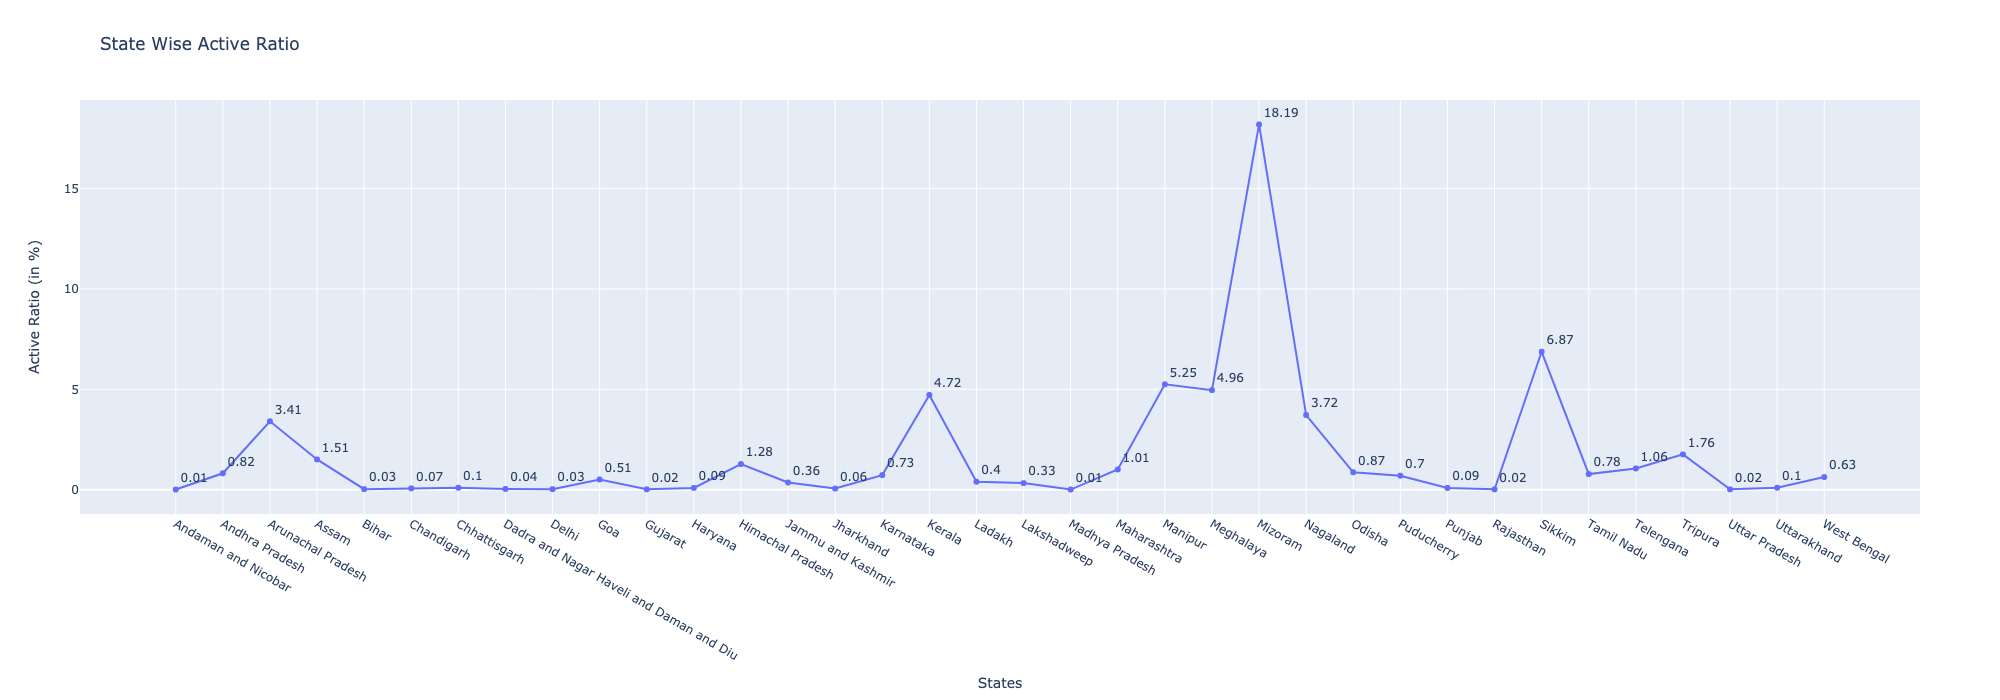

In [18]:
cases = dataset.groupby('State/UTs')['Active Ratio (%)'].mean()
fig = px.line(x = cases.index, y = cases.values, text = cases.values,
       labels = {'x': 'States', 'y' : 'Active Ratio (in %)'}, title = 'State Wise Active Ratio')
fig.update_traces(textposition="top right")
fig.update_layout(width = 2000, height = 700)
fig.show('png')

From above, we can see that the active cases ratio of Mizoram is the highest at 18.19%, whereas Andaman and Nicobar and Madhya Pradesh has the least active cases ratio at 0.01%

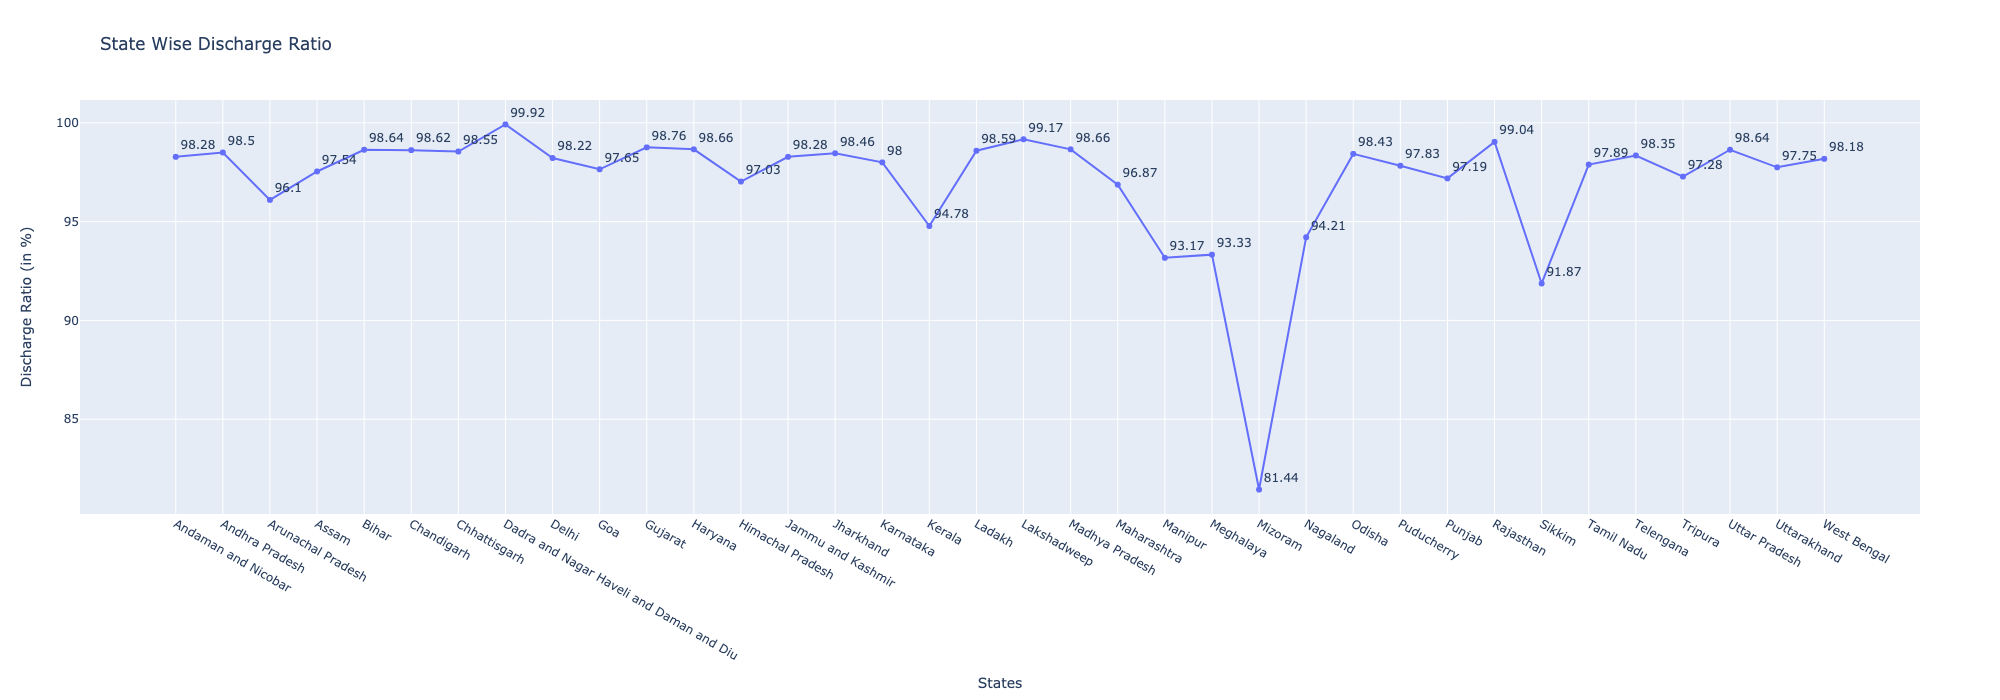

In [19]:
cases = dataset.groupby('State/UTs')['Discharge Ratio (%)'].mean()
fig = px.line(x = cases.index, y = cases.values, text = cases.values,
       labels = {'x': 'States', 'y' : 'Discharge Ratio (in %)'}, title = 'State Wise Discharge Ratio')
fig.update_traces(textposition="top right")
fig.update_layout(width = 2000, height = 700)
fig.show('png')

From above, we can see that the discahrge ratio of Dadra and Nagar Haveli and Daman and Diu combined is the highest at 99.92%, whereas Mizoram has the least discahrge ratio at 81.44%

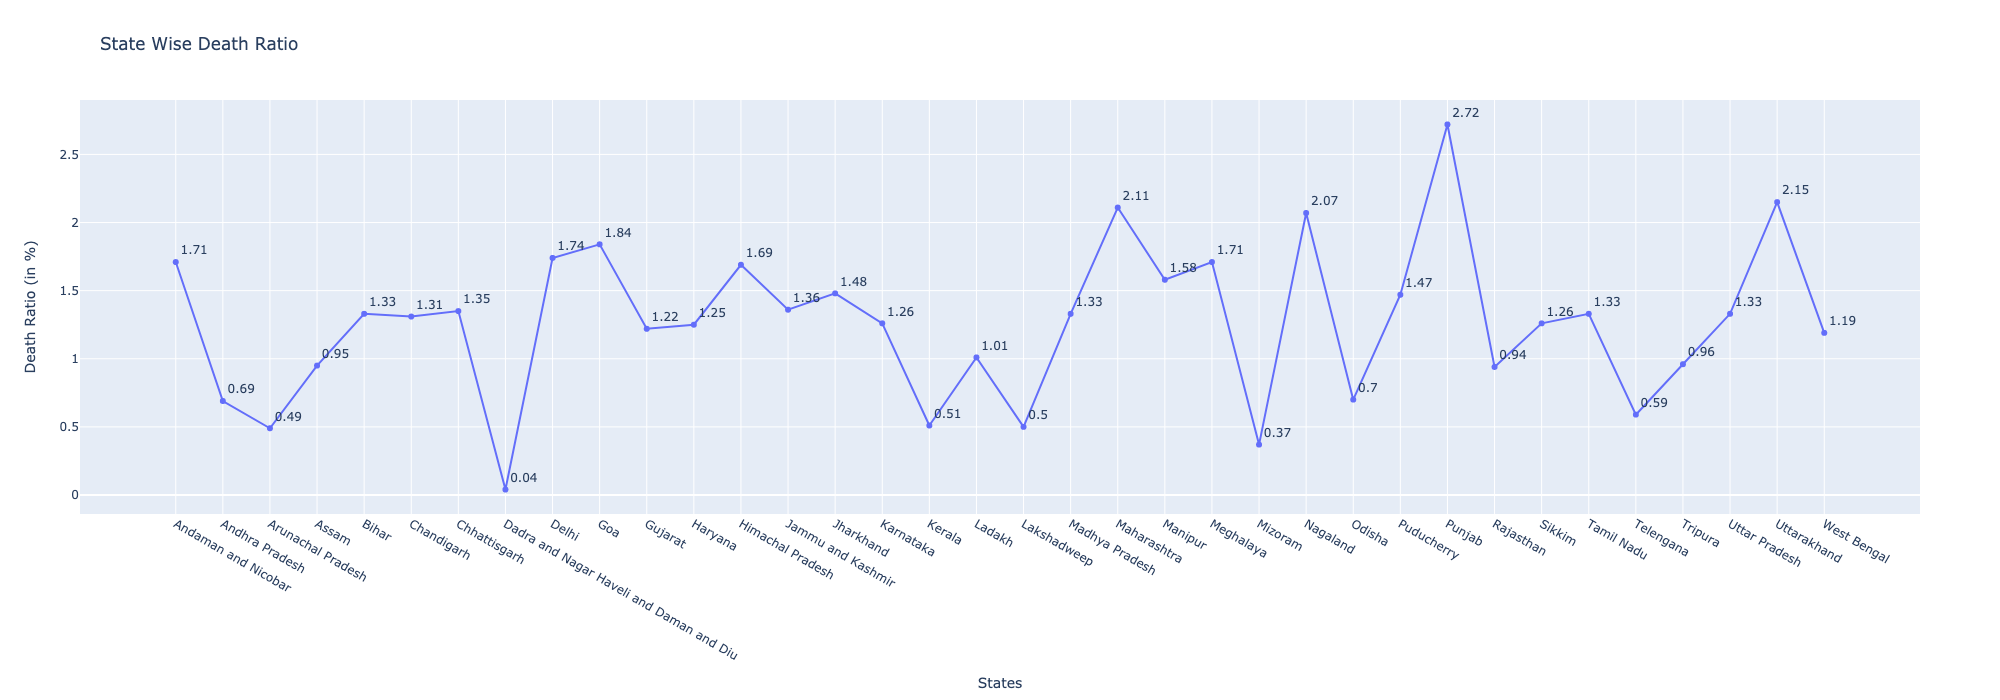

In [20]:
cases = dataset.groupby('State/UTs')['Death Ratio (%)'].mean()
fig = px.line(x = cases.index, y = cases.values, text = cases.values,
       labels = {'x': 'States', 'y' : 'Death Ratio (in %)'}, title = 'State Wise Death Ratio')
fig.update_traces(textposition="top right")
fig.update_layout(width = 2000, height = 700)
fig.show('png')

From above, we can see that the death ratio of Dadra and Nagar Haveli and Daman and Diu combined is least, whereas Punjab has the highest death ratio at 2.72%

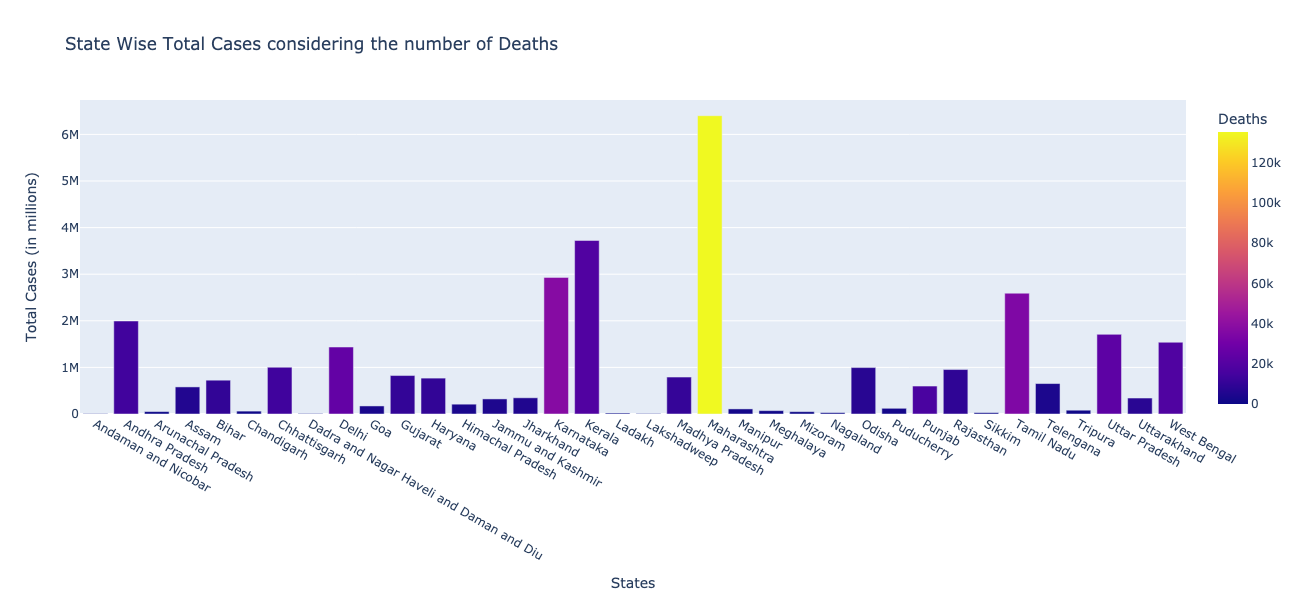

In [21]:
fig = px.bar(x = dataset['State/UTs'], y = dataset['Total Cases'], color = dataset['Deaths'],
       labels = {'x': 'States', 'y' : 'Total Cases (in millions)', 'color': 'Deaths'}, 
             title = 'State Wise Total Cases considering the number of Deaths')
fig.update_layout(width=1300, height=600)
fig.show('png')

The state leading with the total number of cases and deaths at the same time, is the state of 'Maharashtra'.

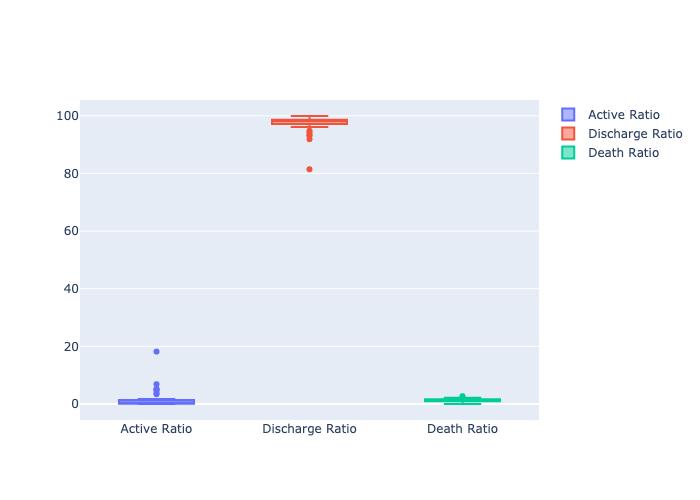

In [22]:
fig = go.Figure()
df = pd.DataFrame({'Active Ratio': dataset['Active Ratio (%)'], 'Discharge Ratio': dataset['Discharge Ratio (%)'],
                  'Death Ratio': dataset['Death Ratio (%)']})

for col in df:
    fig.add_trace(go.Box(y = df[col].values, name = df[col].name))
fig.show('png')

From above, we can deduce that the Discharge ratio is quite exemplary for India, both the Active ratio and Death ratio are quite dormant.

### General Trends

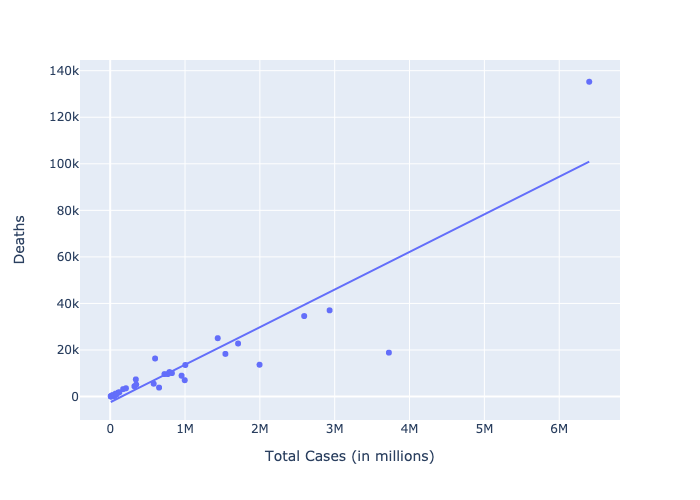

In [23]:
fig = px.scatter(x = dataset['Total Cases'], y = dataset['Deaths'], trendline="ols",
          labels = {'x': 'Total Cases (in millions)', 'y': 'Deaths'})
fig.show('png')

From above, it is clearly visible that as the total number of cases increase, the number of deaths also increase simultaneously.

Here we are setting the trendlline as "ols" which stands for "ordinary least square" and it is a type of linear least squares method for estimating the unknown parameters in a linear regression model

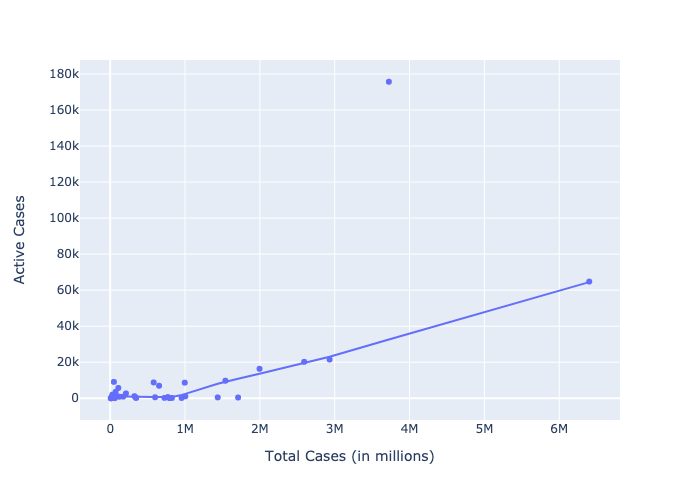

In [24]:
fig = px.scatter(x = dataset['Total Cases'], y = dataset['Active'], trendline = "lowess",
          labels = {'x': 'Total Cases (in millions)', 'y': 'Active Cases'})
fig.show('png')

From above, it is clearly visible that as the total number of cases increase, the number of active cases also increase simultaneously.

Here we are setting the trendlline as "lowess" which stands for "locally weighted scatterplot smoothing", It is a strongly related non-parametric regression method that combines multiple regression models in a k-nearest-neighbor-based meta-model. It is a common method for local polynomial regression.

### Analysis of the Top 5 States

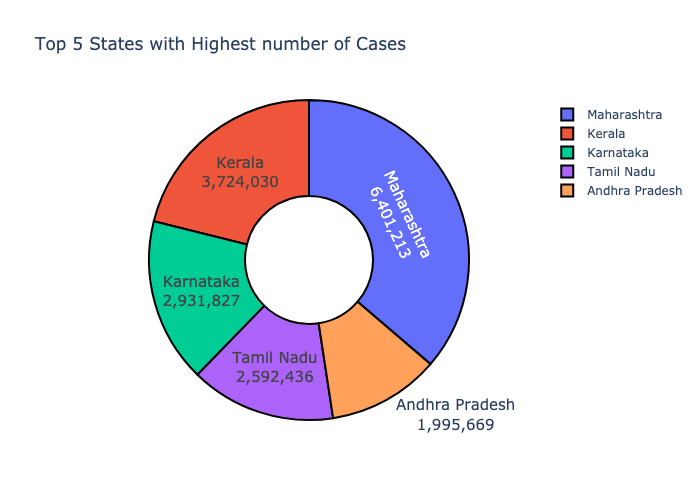

In [25]:
df = dataset.sort_values(by=['Total Cases'], ascending = False).head(5)
fig = go.Figure(data = [go.Pie(labels = df['State/UTs'], values = df['Total Cases'])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="Top 5 States with Highest number of Cases")
fig.show('png')

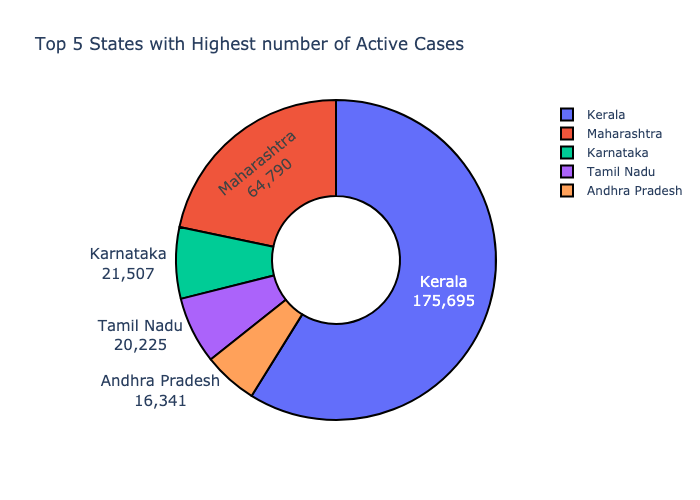

In [26]:
df = dataset.sort_values(by=['Active'], ascending = False).head(5)
fig = go.Figure(data = [go.Pie(labels = df['State/UTs'], values = df['Active'])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="Top 5 States with Highest number of Active Cases")
fig.show('png')

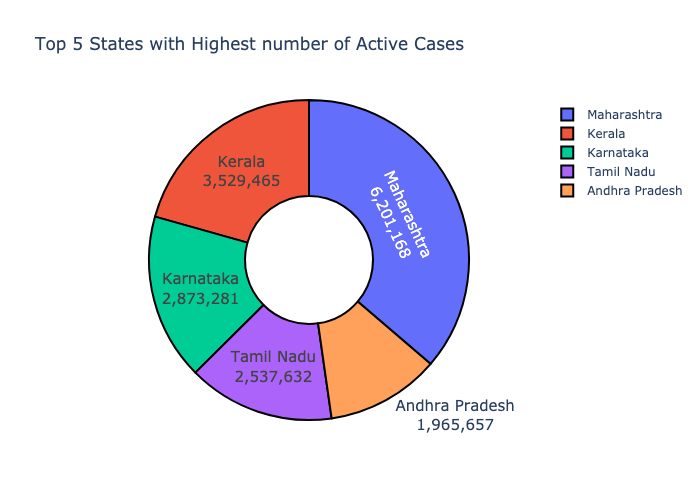

In [27]:
df = dataset.sort_values(by=['Discharged'], ascending = False).head(5)
fig = go.Figure(data = [go.Pie(labels = df['State/UTs'], values = df['Discharged'])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="Top 5 States with Highest number of Active Cases")
fig.show('png')

### Individual Analysis (State-wise)

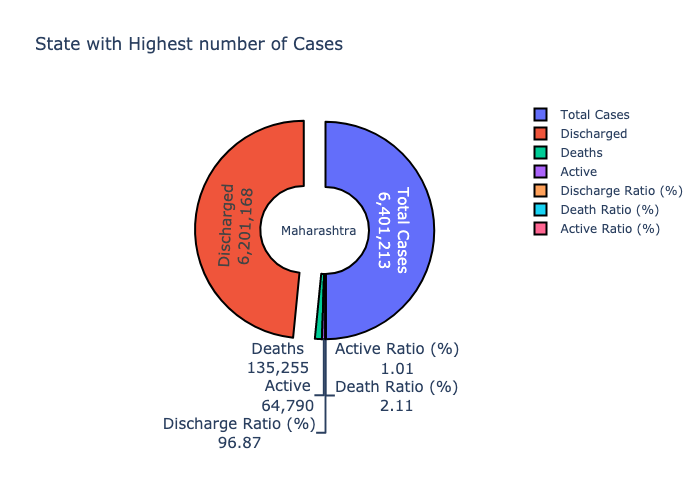

In [28]:
most_cases =  dataset[dataset['Total Cases'] == max(dataset['Total Cases'])]
df = most_cases.groupby(by = ['State/UTs']).sum().T
fig = go.Figure(data = [go.Pie(labels = df.index, values = df.values.flatten(), pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="State with Highest number of Cases", 
                  annotations = [dict(text = df.T.index[0], x = 0.48, y = 0.5, font_size = 12, showarrow = False)])
fig.show('png')

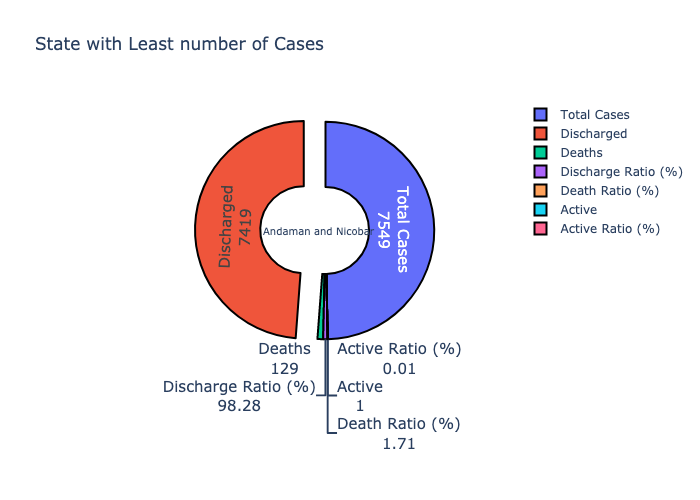

In [29]:
most_cases =  dataset[dataset['Total Cases'] == min(dataset['Total Cases'])]
df = most_cases.groupby(by = ['State/UTs']).sum().T
fig = go.Figure(data = [go.Pie(labels = df.index, values = df.values.flatten(), pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="State with Least number of Cases", 
                  annotations = [dict(text = df.T.index[0], x = 0.48, y = 0.5, font_size = 10, showarrow = False)])
fig.show('png')

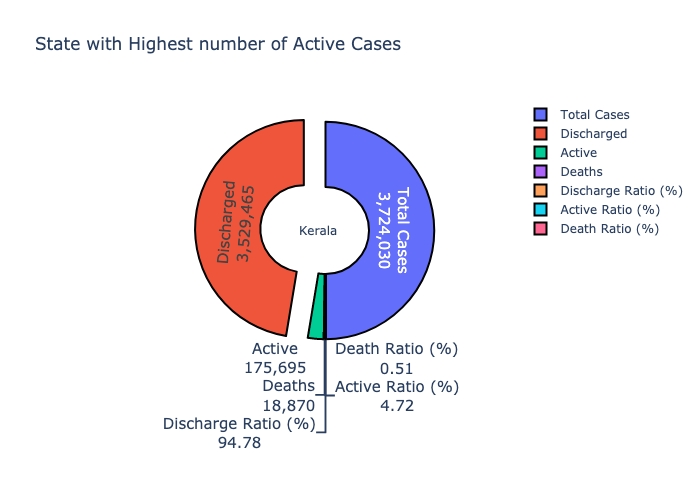

In [30]:
most_cases =  dataset[dataset['Active'] == max(dataset['Active'])]
df = most_cases.groupby(by = ['State/UTs']).sum().T
fig = go.Figure(data = [go.Pie(labels = df.index, values = df.values.flatten(), pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="State with Highest number of Active Cases", 
                  annotations = [dict(text = df.T.index[0], x = 0.48, y = 0.5, font_size = 12, showarrow = False)])
fig.show('png')

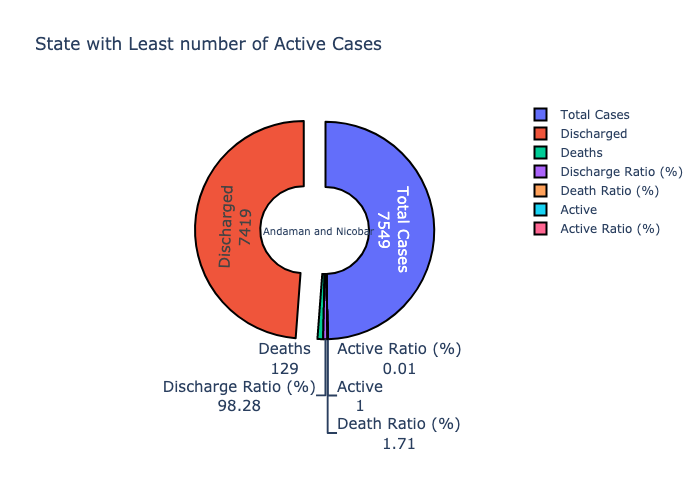

In [31]:
most_cases =  dataset[dataset['Active'] == min(dataset['Active'])]
df = most_cases.groupby(by = ['State/UTs']).sum().T
fig = go.Figure(data = [go.Pie(labels = df.index, values = df.values.flatten(), pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="State with Least number of Active Cases", 
                  annotations = [dict(text = df.T.index[0], x = 0.48, y = 0.5, font_size = 10, showarrow = False)])
fig.show('png')

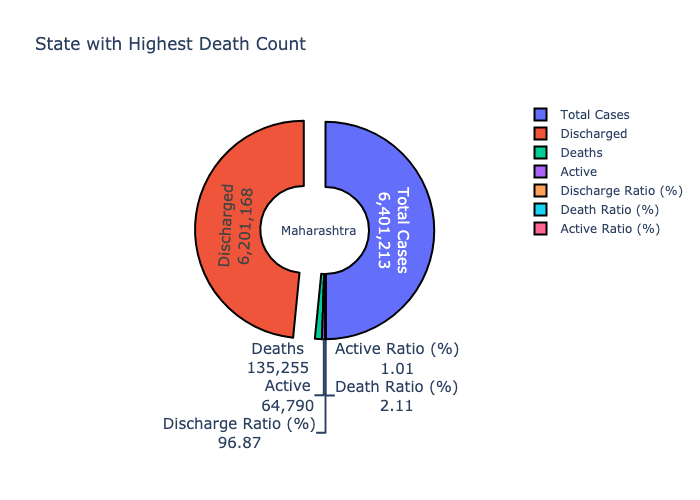

In [33]:
most_cases =  dataset[dataset['Deaths'] == max(dataset['Deaths'])]
df = most_cases.groupby(by = ['State/UTs']).sum().T
fig = go.Figure(data = [go.Pie(labels = df.index, values = df.values.flatten(), pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="State with Highest Death Count", 
                  annotations = [dict(text = df.T.index[0], x = 0.48, y = 0.5, font_size = 12, showarrow = False)])
fig.show('png')

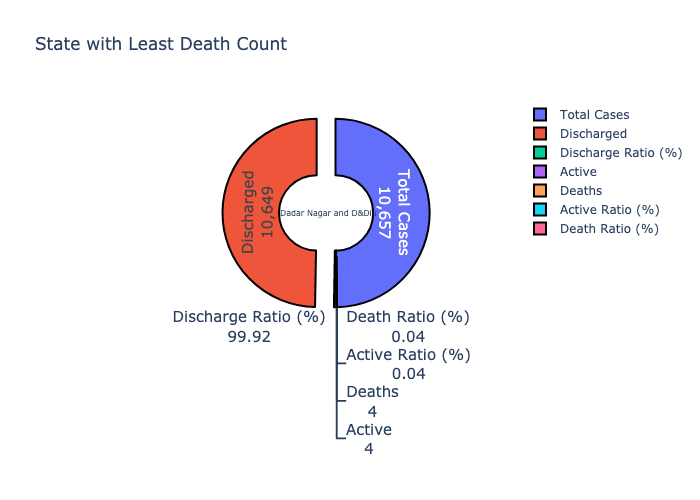

In [35]:
most_cases =  dataset[dataset['Deaths'] == min(dataset['Deaths'])]
df = most_cases.groupby(by = ['State/UTs']).sum().T
fig = go.Figure(data = [go.Pie(labels = df.index, values = df.values.flatten(), pull=[0, 0, 0.2, 0])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'label+value', textfont_size=15, hole = 0.4,
                  marker=dict(line = dict(color = '#000000', width = 2)))
fig.update_layout( title_text="State with Least Death Count", 
                  annotations = [dict(text = 'Dadar Nagar and D&Diu', x = 0.48, y = 0.5, font_size = 8, showarrow = False)])
fig.show('png')

<hr>

## **Let's take a closer look at the Vaccination Drive in India**

### Basic Data Wrangling

In [36]:
dataset1 = pd.read_csv('./input/COVID-19 India Statewise Vaccine Data.csv')
dataset1.head()

,State/UTs,Dose 1,Dose 2,Total Vaccination Doses
0,Andaman and Nicobar,235835,98337,334172
1,Andhra Pradesh,18967840,6653976,25621816
2,Arunachal Pradesh,704206,204773,908979
3,Assam,12241611,2582327,14823938
4,Bihar,25869605,5016297,30885902


In [37]:
print("The shape of the dataset is",dataset1.shape)

The shape of the dataset is (37, 4)


In [38]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State/UTs                37 non-null     object
 1   Dose 1                   37 non-null     int64 
 2   Dose 2                   37 non-null     int64 
 3   Total Vaccination Doses  37 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [39]:
dataset1.describe(include = 'all')

,State/UTs,Dose 1,Dose 2,Total Vaccination Doses
count,37,3.700000e+01,3.700000e+01,3.700000e+01
unique,37,NaN,NaN,NaN
top,Uttar Pradesh,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,1.177622e+07,3.376540e+06,1.515276e+07
std,NaN,1.302253e+07,3.602243e+06,1.643777e+07
min,NaN,5.180900e+04,1.840800e+04,7.021700e+04
25%,NaN,7.528940e+05,2.562650e+05,1.009159e+06
50%,NaN,8.478252e+06,2.201788e+06,1.120364e+07
75%,NaN,1.896784e+07,5.037828e+06,2.562182e+07


In [40]:
dataset1.isnull().sum()

State/UTs                  0
Dose 1                     0
Dose 2                     0
Total Vaccination Doses    0
dtype: int64

### Exploratory Data Analysis

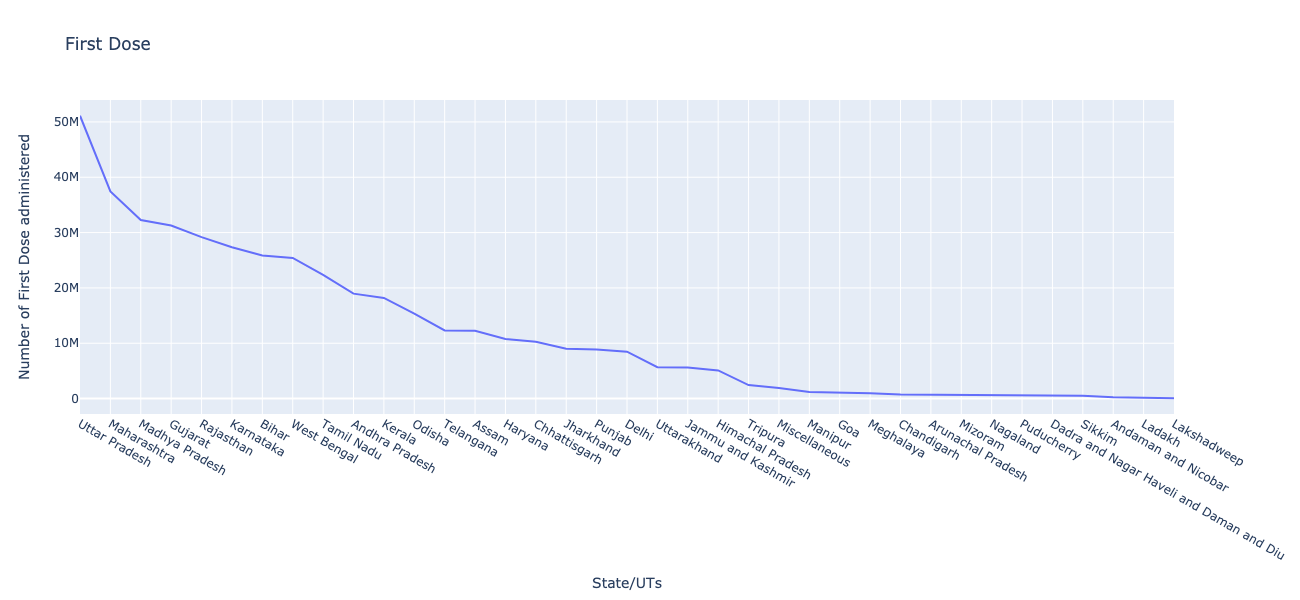

In [41]:
df = dataset1.sort_values(by = ['Dose 1'], ascending = False)
fig = px.line(df, x = 'State/UTs', y = 'Dose 1', title = "First Dose",
             labels = {'Dose 1': 'Number of First Dose administered'})
fig.update_layout(width=1300, height=600)
fig.show('png')

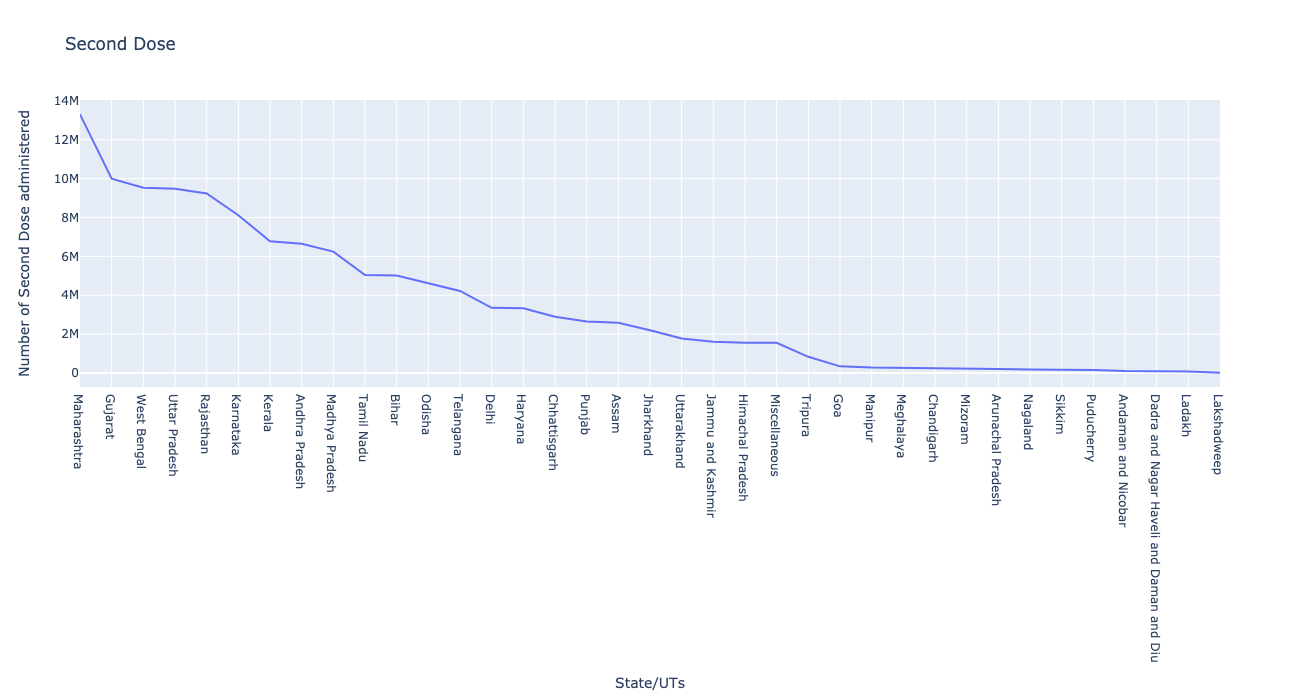

In [42]:
df = dataset1.sort_values(by = ['Dose 2'], ascending = False)
fig = px.line(df, x = 'State/UTs', y = 'Dose 2', title = "Second Dose",
             labels = {'Dose 2': 'Number of Second Dose administered'})
fig.update_layout(width=1300, height=700)
fig.show('png')

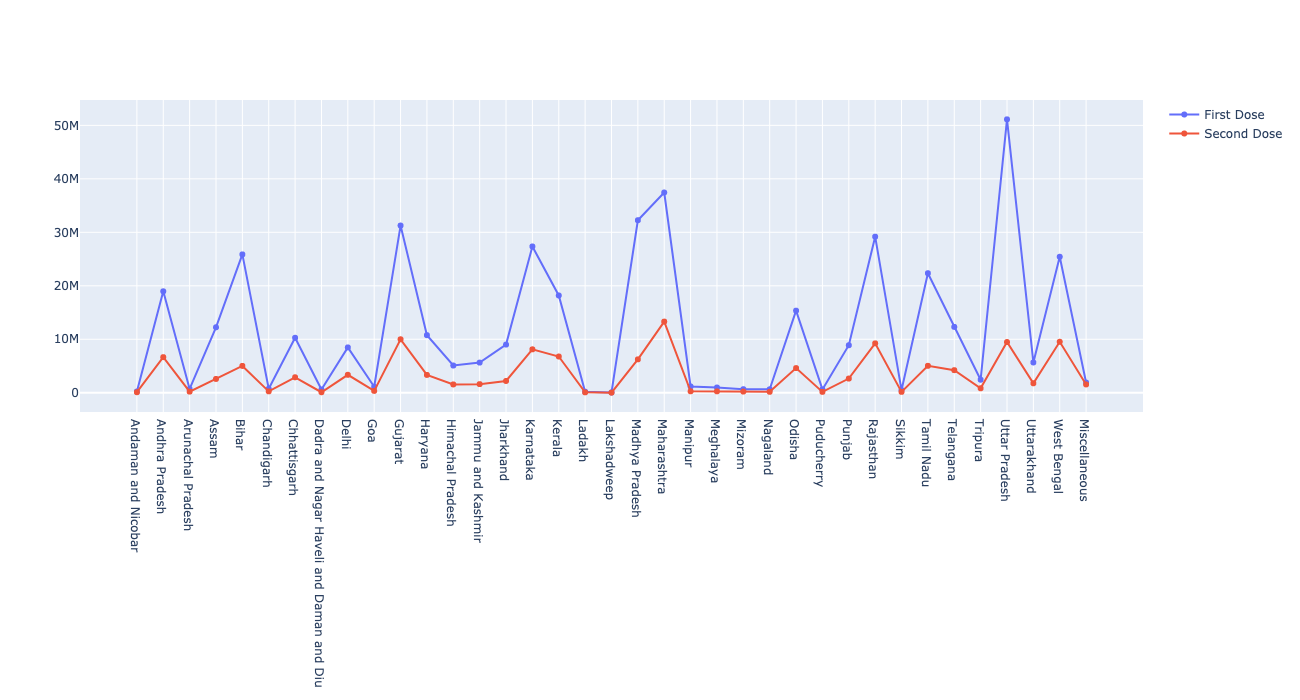

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dataset1['State/UTs'], y=dataset1['Dose 1'],
                    mode='lines+markers',
                    name='First Dose'))
fig.add_trace(go.Scatter(x=dataset1['State/UTs'], y=dataset1['Dose 2'],
                    mode='lines+markers',
                    name='Second Dose'))
fig.update_layout(width=1300, height=700)
fig.show('png')

**Q) Which state or union territory is the most vaccinated?**

* As we can see from the above graph(Acumulated figures for vacinations) Uttar Pradesh is the state with highest number of Vaccinations.
* *Vaccinations: 60,606,763*

**Q) Which state or union territory is the least vaccinated?**

* As we can see from the above graph(Acumulated figures for vacinations) Lakshadweep is the union territory with lowest number of Vaccinations.
* *Vaccinations: 70,217*

### Analysis of the Top 10 States

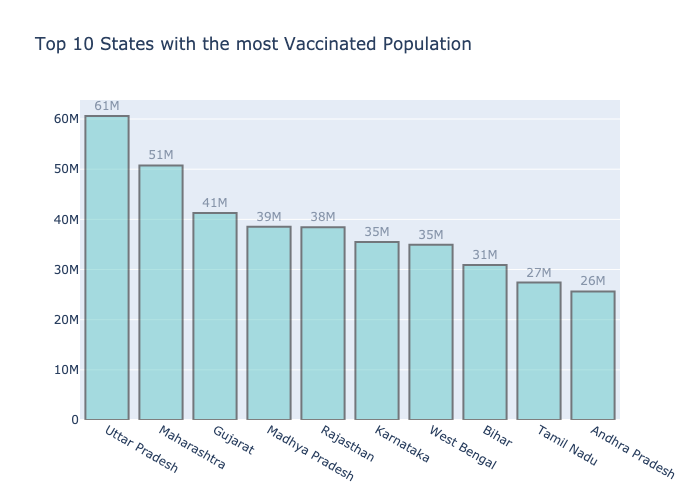

In [44]:
df = dataset1.sort_values('Total Vaccination Doses', ascending = False)[:10]
fig = go.Figure(data=[go.Bar(x = df['State/UTs'], y = df['Total Vaccination Doses'], text = df['Total Vaccination Doses'])])
fig.update_traces(marker_color='rgb(100,200,200)', marker_line_color='rgb(0,0,0)',
                  marker_line_width=2, opacity=0.5, texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(title_text='Top 10 States with the most Vaccinated Population', uniformtext_minsize = 12, uniformtext_mode='hide')
fig.show('png')

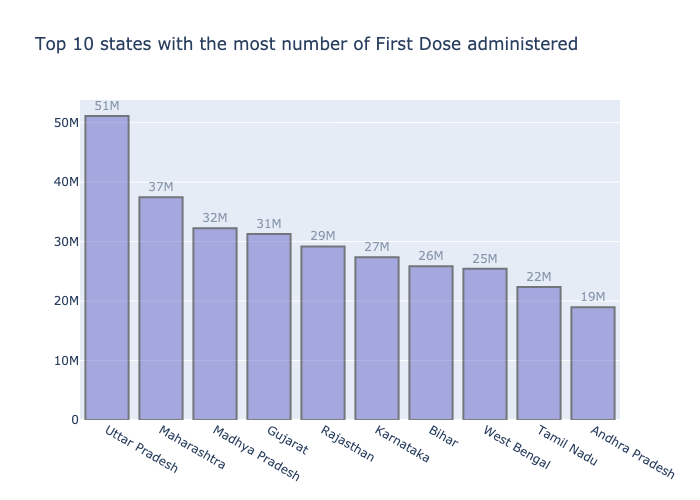

In [45]:
df = dataset1.sort_values('Dose 1', ascending = False)[:10]
fig = go.Figure(data=[go.Bar(x = df['State/UTs'], y = df['Dose 1'], text = df['Dose 1'])])
fig.update_traces(marker_color='rgb(100,100,200)', marker_line_color='rgb(0,0,0)',
                  marker_line_width=2, opacity=0.5, texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(title_text='Top 10 states with the most number of First Dose administered', uniformtext_minsize = 12, uniformtext_mode='hide')
fig.show('png')

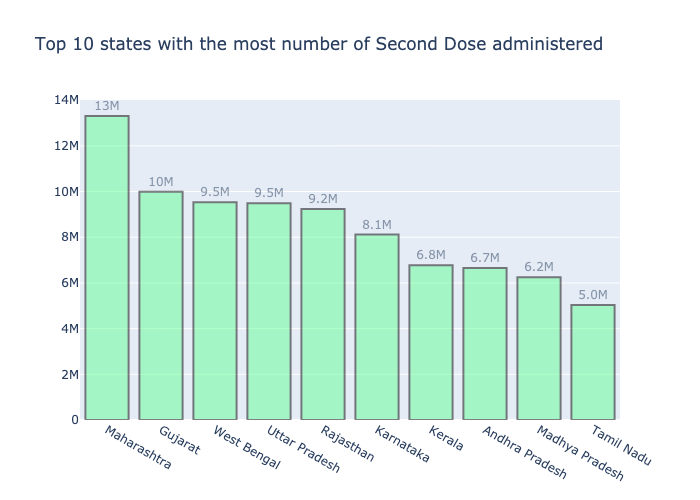

In [46]:
df = dataset1.sort_values('Dose 2', ascending = False)[:10]
fig = go.Figure(data=[go.Bar(x = df['State/UTs'], y = df['Dose 2'], text = df['Dose 2'])])
fig.update_traces(marker_color='rgb(100,300,150)', marker_line_color='rgb(0,0,0)',
                  marker_line_width=2, opacity=0.5, texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(title_text='Top 10 states with the most number of Second Dose administered', uniformtext_minsize = 12, uniformtext_mode='hide')
fig.show('png')

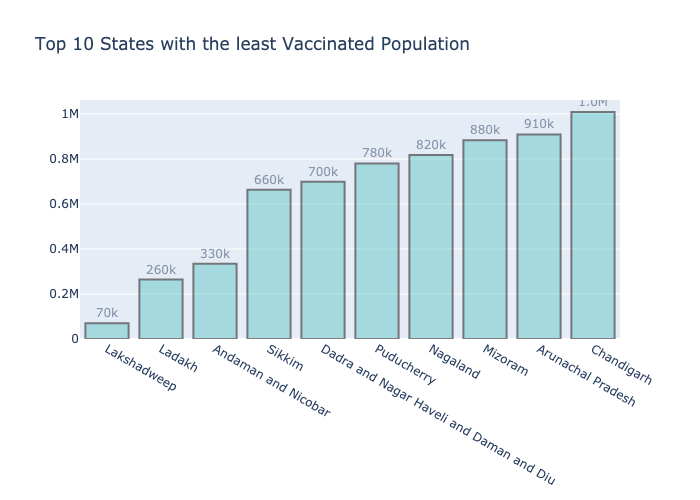

In [47]:
df = dataset1.sort_values('Total Vaccination Doses', ascending = True)[:10]
fig = go.Figure(data=[go.Bar(x = df['State/UTs'], y = df['Total Vaccination Doses'], text = df['Total Vaccination Doses'])])
fig.update_traces(marker_color='rgb(100,200,200)', marker_line_color='rgb(0,0,0)',
                  marker_line_width=2, opacity=0.5, texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(title_text='Top 10 States with the least Vaccinated Population', uniformtext_minsize = 12, uniformtext_mode='hide')
fig.show('png')

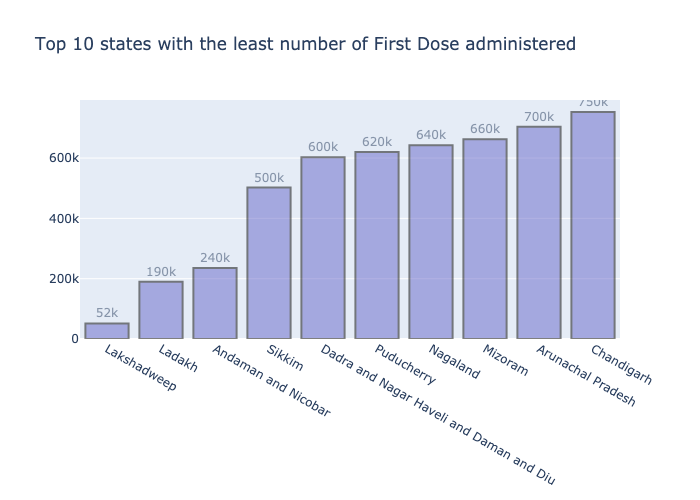

In [48]:
df = dataset1.sort_values('Dose 1', ascending = True)[:10]
fig = go.Figure(data=[go.Bar(x = df['State/UTs'], y = df['Dose 1'], text = df['Dose 1'])])
fig.update_traces(marker_color='rgb(100,100,200)', marker_line_color='rgb(0,0,0)',
                  marker_line_width=2, opacity=0.5, texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(title_text='Top 10 states with the least number of First Dose administered', uniformtext_minsize = 12, uniformtext_mode='hide')
fig.show('png')

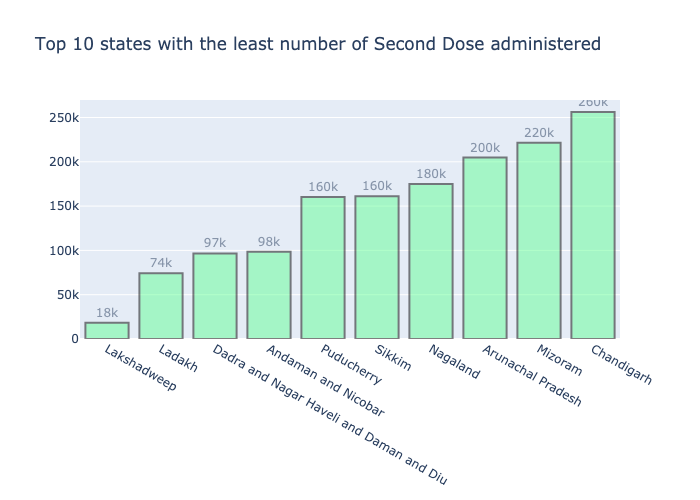

In [49]:
df = dataset1.sort_values('Dose 2', ascending = True)[:10]
fig = go.Figure(data=[go.Bar(x = df['State/UTs'], y = df['Dose 2'], text = df['Dose 2'])])
fig.update_traces(marker_color='rgb(100,300,150)', marker_line_color='rgb(0,0,0)',
                  marker_line_width=2, opacity=0.5, texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(title_text='Top 10 states with the least number of Second Dose administered', uniformtext_minsize = 12, uniformtext_mode='hide')
fig.show('png')

<hr>

## **Forecasting New Cases and Deaths for India**

It was observed that the data needed to have limiting upper and lower values otherwise predictions tend to go negative while approaching flatness. Hence, the dataset at necessary points are given tentative floor and cap values on the required points.

About Prophet:

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

In [120]:
dataset2 = pd.read_csv('./input/covid19_by_country.csv')
dataset2.head()

,Country,CountryAlpha3Code,Date,confirmed,deaths,recoveries,confirmed_inc,deaths_inc,recoveries_inc,ECR,GRTStringencyIndex,DaysSince1Cases,DaysSince100Cases,confirmed_PopPct,deaths_PopPct,recoveries_PopPct
0,Afghanistan,AFG,2020-01-22,0,0,0.0,41.0,0.0,6.0,0.0,0.0,-33,-66,0.0,0.0,0.0
1,Afghanistan,AFG,2020-01-23,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-32,-65,0.0,0.0,0.0
2,Afghanistan,AFG,2020-01-24,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-31,-64,0.0,0.0,0.0
3,Afghanistan,AFG,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-30,-63,0.0,0.0,0.0
4,Afghanistan,AFG,2020-01-26,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-29,-62,0.0,0.0,0.0


In [121]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819733 entries, 0 to 2819732
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Country             object 
 1   CountryAlpha3Code   object 
 2   Date                object 
 3   confirmed           int64  
 4   deaths              int64  
 5   recoveries          float64
 6   confirmed_inc       float64
 7   deaths_inc          float64
 8   recoveries_inc      float64
 9   ECR                 float64
 10  GRTStringencyIndex  float64
 11  DaysSince1Cases     int64  
 12  DaysSince100Cases   int64  
 13  confirmed_PopPct    float64
 14  deaths_PopPct       float64
 15  recoveries_PopPct   float64
dtypes: float64(9), int64(4), object(3)
memory usage: 344.2+ MB


In [122]:
dataset2.describe(include = 'all')

,Country,CountryAlpha3Code,Date,confirmed,deaths,recoveries,confirmed_inc,deaths_inc,recoveries_inc,ECR,GRTStringencyIndex,DaysSince1Cases,DaysSince100Cases,confirmed_PopPct,deaths_PopPct,recoveries_PopPct
count,2819733,2819733,2819733,2.819733e+06,2.819733e+06,2.819733e+06,2.819733e+06,2.819733e+06,2.819733e+06,2.819733e+06,2.710901e+06,2.819733e+06,2.819733e+06,2.818587e+06,2.818587e+06,2.818587e+06
unique,192,193,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,US,USA,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1549392,1549392,4921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.602711e+06,1.981717e+05,1.448514e+06,4.128774e+04,7.609592e+02,3.021563e-04,2.958784e-02,5.471362e+01,2.780461e+02,2.482223e+02,3.214012e+00,6.783137e-02,6.303311e-01
std,NaN,NaN,NaN,1.227946e+07,2.187029e+05,3.205724e+06,5.605848e+04,9.225106e+02,3.562423e+05,1.159332e-01,1.920189e+01,1.667367e+02,1.689478e+02,3.819176e+00,7.183008e-02,1.533980e+00
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-3.486670e+05,-1.918000e+03,-3.097475e+07,-7.500000e-01,0.000000e+00,-5.730000e+02,-5.730000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,9.515000e+04,4.748000e+03,0.000000e+00,9.400000e+01,2.000000e+00,0.000000e+00,7.060036e-04,4.630000e+01,1.350000e+02,1.050000e+02,7.257195e-03,3.451222e-04,0.000000e+00
50%,NaN,NaN,NaN,2.802040e+06,1.245400e+05,7.831400e+04,2.452800e+04,4.910000e+02,2.900000e+01,4.307544e-03,5.648000e+01,2.780000e+02,2.490000e+02,1.365393e+00,4.525429e-02,6.042670e-03
75%,NaN,NaN,NaN,1.741277e+07,3.602280e+05,1.171447e+06,5.663600e+04,1.123000e+03,1.427900e+04,1.246603e-02,6.759000e+01,4.220000e+02,3.930000e+02,6.559611e+00,1.248644e-01,4.457541e-01


In [123]:
dataset2.isnull().sum()

Country                    0
CountryAlpha3Code          0
Date                       0
confirmed                  0
deaths                     0
recoveries                 0
confirmed_inc              0
deaths_inc                 0
recoveries_inc             0
ECR                        0
GRTStringencyIndex    108832
DaysSince1Cases            0
DaysSince100Cases          0
confirmed_PopPct        1146
deaths_PopPct           1146
recoveries_PopPct       1146
dtype: int64

In [124]:
df = dataset2.copy()
df.set_index("Country", inplace = True)
data_India = df.loc[["India"]]
data_India = data_India.reset_index()
data_India.drop(['GRTStringencyIndex', 'confirmed_PopPct', 'deaths_PopPct', 'recoveries_PopPct'], inplace = True, axis = 1)
data_India.head(2)

,Country,CountryAlpha3Code,Date,confirmed,deaths,recoveries,confirmed_inc,deaths_inc,recoveries_inc,ECR,DaysSince1Cases,DaysSince100Cases
0,India,IND,2020-01-22,0,0,0.0,41.0,0.0,6.0,0.0,-8,-52
1,India,IND,2020-01-23,0,0,0.0,0.0,0.0,0.0,0.0,-7,-51


In [125]:
data = data_India.copy()
data = data[['Date', 'deaths_inc']]
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        573 non-null    datetime64[ns]
 1   deaths_inc  573 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [126]:
data=data.rename(columns={data.columns[0]:'ds', data.columns[1]:'y'})
plt.figure(figsize=(20,6))
plt.scatter(data['ds'], data['y'])
plt.title('Covid-19 deaths per day in India', size=20)
plt.xlabel('Dates')
plt.ylabel('No. of Deaths')
data['floor']=0                                     #here floor value is provided so as to avoid negative value predictions
data['cap']=6000                                    #here cap values are provided because it's necessary for logistic growth
data.head(2)

,ds,y,floor,cap
0,2020-01-22,0.0,0,6000
1,2020-01-23,0.0,0,6000


In [127]:
model= Prophet(changepoint_prior_scale=0.9, growth='logistic')      #growth is kept logistic so that the graph can be consistent along with changing points
model.fit(data)
x= model.make_future_dataframe(periods=30,freq='D')
x['floor']=0                                                  #here floor value is provided so as to avoid negative value predictions
x['cap']=6000                                                 #here cap values are provided because it's necessary for logistic growth
forecast=model.predict(x)
forecast.info()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          603 non-null    datetime64[ns]
 1   trend                       603 non-null    float64       
 2   cap                         603 non-null    int64         
 3   floor                       603 non-null    int64         
 4   yhat_lower                  603 non-null    float64       
 5   yhat_upper                  603 non-null    float64       
 6   trend_lower                 603 non-null    float64       
 7   trend_upper                 603 non-null    float64       
 8   additive_terms              603 non-null    float64       
 9   additive_terms_lower        603 non-null    float64       
 10  additive_terms_upper        603 non-null    float64       
 11  weekly                      603 non-null    float64       

In [128]:
model.plot(forecast,figsize=(20,6));
plt.title("Covid-19 Deaths in India", size=30)
plt.xlabel("Date", size=20)
plt.ylabel("Deaths", size=20)
#Extra lines for number
forecast_plus=forecast.loc[[550,570,590,600]]
for a,b in zip(forecast_plus['ds'], forecast_plus['yhat']):
    plt.text(a, b, str(int(b)),bbox=dict(facecolor='green', alpha=0.4), fontsize=14)

**From the above forecast we can say that the death rate will steadily decline thus reaching a flatness point.**

In [129]:
data = data_India.copy()
data = data[['Date','confirmed_inc']]
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           573 non-null    datetime64[ns]
 1   confirmed_inc  573 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [130]:
import matplotlib.pyplot as plt
data=data.rename(columns={data.columns[0]:'ds', data.columns[1]:'y'})
plt.figure(figsize=(20,7))
plt.scatter(data['ds'], data['y'])
plt.title('Covid-19 cases day in India', size=20)
plt.xlabel('Dates')
plt.ylabel('No. of cases')
data['floor']=0                              #here floor value is provided so as to avoid negative value predictions
data['cap']=500000                          #here cap values are provided because it's necessary for logistic growth

In [131]:
from fbprophet import Prophet
model2= Prophet(changepoint_prior_scale=0.6, growth='logistic')     #growth is kept logistic so that the graph can be consistent along with changing points
model2.fit(data)
x2= model2.make_future_dataframe(periods=30,freq='D')
x2['floor']=0                                                           #here floor value is provided so as to avoid negative value predictions
x2['cap']=500000                                                        #here cap values are provided because it's necessary for logistic growth
forecast2=model2.predict(x2)
forecast.info()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          603 non-null    datetime64[ns]
 1   trend                       603 non-null    float64       
 2   cap                         603 non-null    int64         
 3   floor                       603 non-null    int64         
 4   yhat_lower                  603 non-null    float64       
 5   yhat_upper                  603 non-null    float64       
 6   trend_lower                 603 non-null    float64       
 7   trend_upper                 603 non-null    float64       
 8   additive_terms              603 non-null    float64       
 9   additive_terms_lower        603 non-null    float64       
 10  additive_terms_upper        603 non-null    float64       
 11  weekly                      603 non-null    float64       

In [132]:
model2.plot(forecast2,figsize=(20,6), xlabel='Dates', ylabel='Covid-19 Cases');
plt.title("Covid-19 Cases", size=30)
plt.xlabel("Date", size=20)
plt.ylabel("Cases", size=20)
#Extra lines for number
forecast_plus2=forecast2.loc[[550,570,590,600]]
for a,b in zip(forecast_plus2['ds'], forecast_plus2['yhat']):
  plt.text(a, b, str(int(b)),bbox=dict(facecolor='green', alpha=0.4), fontsize=14)

**From the above forecast we can say that the new cases will steadily decline thus flattening the curve eventually.**

**Final Analysis**

In [133]:
cases = dataset['Total Cases'].sum()
deaths = dataset['Deaths'].sum()
vaccinations = dataset1['Total Vaccination Doses'].sum()
print('Current acumulated Indian figures:')
print('Cases:\t\t',f'{int(cases):,}')
print('Deaths:\t\t',f'{int(deaths):,}')
print('Vaccinations:\t',f'{int(vaccinations):,}')

Current acumulated Indian figures:
Cases:		 32,285,857
Deaths:		 432,519
Vaccinations:	 560,652,030
